<a href="https://colab.research.google.com/github/ssudheerrao/test/blob/master/use%20case%20prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from google.colab import files
uploaded= files.upload()

Saving Transformed_Data_Case_Study.csv to Transformed_Data_Case_Study (1).csv


In [4]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Transformed_Data_Case_Study.csv']))
df

,OID,Region,Account Segmentation,TCV,Annuity,eXcell,Prod - Commodity,Prod - Enterprise,Project,Sales Gestation,Service Period,Time to Start Service,Target,Closed/No Action_Days_Spent,Contracting/Closing_Days_Spent,Identify_Days_Spent,Lead (Above the Funnel)_Days_Spent,Negotiate_Days_Spent,Propose_Days_Spent,Qualify_Days_Spent,Information_Days_Spent
0,OID1569,2,3,26079990.0,1,0,0,0,0,501,1825,6,1,8,16,34,0,2,33,19,35
1,OID1850,1,1,13100000.0,1,0,0,0,0,249,1108,78,1,4,8,17,0,1,16,9,17
2,OID1378,1,1,50658.0,1,0,0,0,0,4,16,13,1,0,0,0,0,0,0,0,0
3,OID1473,3,7,10168147.0,1,0,0,0,0,206,1825,512,1,3,7,14,0,1,14,8,14
4,OID0125,4,1,143150.0,0,0,0,0,1,96,426,23,1,2,3,7,0,0,6,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,OID0169,1,8,28022.0,0,0,0,1,0,552,60,74,1,4,30,38,11,4,19,23,15
2212,OID1925,2,8,678920.0,1,0,0,0,0,536,364,25,1,4,29,37,11,4,18,22,15
2213,OID1356,4,3,1926000.0,1,0,0,0,0,201,549,86,1,1,11,14,4,1,7,8,6
2214,OID1514,4,5,322729.0,1,0,0,0,0,252,365,3,1,2,14,17,5,2,9,10,7


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   OID                                 2216 non-null   object 
 1   Region                              2216 non-null   int64  
 2   Account Segmentation                2216 non-null   int64  
 3   TCV                                 2216 non-null   float64
 4   Annuity                             2216 non-null   int64  
 5   eXcell                              2216 non-null   int64  
 6   Prod - Commodity                    2216 non-null   int64  
 7   Prod - Enterprise                   2216 non-null   int64  
 8   Project                             2216 non-null   int64  
 9   Sales Gestation                     2216 non-null   int64  
 10  Service Period                      2216 non-null   int64  
 11  Time to Start Service               2216 no

In [19]:
df.describe()

,Region,Account Segmentation,TCV,Annuity,eXcell,Prod - Commodity,Prod - Enterprise,Project,Sales Gestation,Service Period,Time to Start Service,Target,Closed/No Action_Days_Spent,Contracting/Closing_Days_Spent,Identify_Days_Spent,Lead (Above the Funnel)_Days_Spent,Negotiate_Days_Spent,Propose_Days_Spent,Qualify_Days_Spent,Information_Days_Spent
count,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.549639,3.647563,4.506915e+06,0.362365,0.019404,0.190884,0.109657,0.317690,106.894404,289.539711,12444.084386,0.888087,1.797834,4.245939,7.455776,0.701715,0.626354,6.586191,4.390343,6.706679
std,1.168151,2.426504,6.361662e+07,0.480792,0.137972,0.393087,0.312532,0.465683,130.261704,384.232726,19718.042391,0.315331,6.890155,9.248390,8.792252,5.373450,2.772211,7.538480,7.647876,7.692315
min,1.000000,1.000000,-1.268348e+06,0.000000,0.000000,0.000000,0.000000,0.000000,-465.000000,0.000000,0.000000,0.000000,-6.000000,-12.000000,-25.000000,0.000000,-1.000000,-24.000000,-14.000000,-26.000000
25%,2.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,14.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000,2.000000
50%,3.000000,3.000000,9.957000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,53.500000,151.000000,54.000000,1.000000,1.000000,2.000000,4.000000,0.000000,0.000000,4.000000,2.000000,4.000000
75%,3.000000,4.000000,1.306575e+05,1.000000,0.000000,0.000000,0.000000,1.000000,148.250000,365.000000,43646.000000,1.000000,2.000000,6.000000,10.000000,0.000000,1.000000,9.000000,6.000000,9.000000
max,5.000000,9.000000,1.000000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1304.000000,2028.000000,44196.000000,1.000000,312.000000,351.000000,88.000000,234.000000,117.000000,86.000000,273.000000,91.000000


In [18]:
df[df.isnull().any(axis=1)]

,OID,Region,Account Segmentation,TCV,Annuity,eXcell,Prod - Commodity,Prod - Enterprise,Project,Sales Gestation,Service Period,Time to Start Service,Target,Closed/No Action_Days_Spent,Contracting/Closing_Days_Spent,Identify_Days_Spent,Lead (Above the Funnel)_Days_Spent,Negotiate_Days_Spent,Propose_Days_Spent,Qualify_Days_Spent,Information_Days_Spent


In [ ]:
df.drop(['OID'],axis=1,inplace=True)


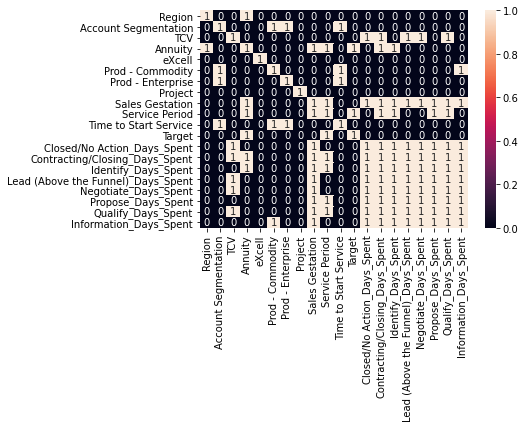

In [42]:
sns.heatmap(df.corr()>0.1,annot=True)

In [44]:
X=df.drop(['Target'],axis=1)
y=df['Target']
X

,Region,Account Segmentation,TCV,Annuity,eXcell,Prod - Commodity,Prod - Enterprise,Project,Sales Gestation,Service Period,Time to Start Service,Closed/No Action_Days_Spent,Contracting/Closing_Days_Spent,Identify_Days_Spent,Lead (Above the Funnel)_Days_Spent,Negotiate_Days_Spent,Propose_Days_Spent,Qualify_Days_Spent,Information_Days_Spent
0,2,3,26079990.0,1,0,0,0,0,501,1825,6,8,16,34,0,2,33,19,35
1,1,1,13100000.0,1,0,0,0,0,249,1108,78,4,8,17,0,1,16,9,17
2,1,1,50658.0,1,0,0,0,0,4,16,13,0,0,0,0,0,0,0,0
3,3,7,10168147.0,1,0,0,0,0,206,1825,512,3,7,14,0,1,14,8,14
4,4,1,143150.0,0,0,0,0,1,96,426,23,2,3,7,0,0,6,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1,8,28022.0,0,0,0,1,0,552,60,74,4,30,38,11,4,19,23,15
2212,2,8,678920.0,1,0,0,0,0,536,364,25,4,29,37,11,4,18,22,15
2213,4,3,1926000.0,1,0,0,0,0,201,549,86,1,11,14,4,1,7,8,6
2214,4,5,322729.0,1,0,0,0,0,252,365,3,2,14,17,5,2,9,10,7


In [118]:
y.value_counts()

1    1968
0     248
Name: Target, dtype: int64

In [119]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)
print(x_smote.shape)
print(y_smote.shape)

(3936, 19)
(3936,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [120]:
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold
x_train, x_test, y_train, y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=40)


In [128]:
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score

In [122]:
print(X_train.shape)
print(y_train.shape)

(3148, 19)
(3148,)


In [123]:
model=LogisticRegression()
model.fit(x_train, y_train)
model.score(x_train,y_train)

0.7090216010165185

In [124]:
y_pred=model.predict(x_test)


In [125]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('f1 score',f1_score(y_test,y_pred))

[[312  92]
 [151 233]]
f1 score 0.6572637517630465


In [114]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

y_pred1=accuracy_score(y_test,xgb_y_predict)
y_pred1


0.9784263959390863

In [129]:
cm=confusion_matrix(y_test,xgb_y_predict)
print(cm)
print('f1 score',f1_score(y_test,xgb_y_predict))

[[399   5]
 [ 12 372]]
f1 score 0.9776609724047305


In [130]:
from google.colab import files
uploaded= files.upload()

Saving Submission File.csv to Submission File.csv


In [134]:
import io
df2=pd.read_csv(io.BytesIO(uploaded['Submission File.csv']))
df2.drop('Term in Months',axis=1,inplace=True)

In [145]:
df2.drop(['OID'],axis=1,inplace=True)


KeyError: ignored

In [146]:
df2['TCV'].apply(int64)

NameError: ignored

In [144]:
df2.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Region                              34 non-null     int64
 1   Account Segmentation                34 non-null     int64
 2   TCV                                 34 non-null     int64
 3   Annuity                             34 non-null     int64
 4   eXcell                              34 non-null     int64
 5   Prod - Commodity                    34 non-null     int64
 6   Prod - Enterprise                   34 non-null     int64
 7   Project                             34 non-null     int64
 8   Sales Gestation                     34 non-null     int64
 9   Service Period                      34 non-null     int64
 10  Time to Start Service               34 non-null     int64
 11  Closed/No Action_Days_Spent         34 non-null     int64
 12  Contractin

In [142]:
xgb_y_predict = xgb_model.predict(df2)


ValueError: ignored

In [ ]:
y_pred2=accuracy_score(df2,xgb_y_predict)
y_pred2